In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import stats
import scipy 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.regression import *
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas_profiling
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [2]:
grid_250 = pd.read_csv('/Users/Desktop/DataCampus/data/real_data/250grid_data.csv')

In [3]:
grid_250 = grid_250.fillna(0)

In [4]:
grid_250.head(3)

,INDEX,ID,총인구,고등여성인구,20대여성인구,유소년인구,고령인구,건축물(30_34),건축물(35),개별주택가격,공시지가,행정동코드,가로등,공영주차장,공중화장실,교육시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_전체
0,0,다마54ba65ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30187,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,1,다마54ba65ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6860,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,2,다마54bb65aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23000,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [507]:
grid_250['성폭력취약인구'] = grid_250['고등여성인구']+grid_250['20대여성인구']
grid_250['건축물(30_)'] = grid_250['건축물(30_34)']+grid_250['건축물(35)']
grid_250['GRADE_폭력'] = grid_250['GRADE_폭력'].apply(lambda x: x-1 if x>0 else x)
grid_250['GRADE_절도'] = grid_250['GRADE_절도'].apply(lambda x: x-1 if x>0 else x)
grid_250['GRADE_성폭력'] = grid_250['GRADE_성폭력'].apply(lambda x: x-1 if x>0 else x)
grid_250 = grid_250.drop(columns = ['20대여성인구','고등여성인구','INDEX'])

In [508]:
grid_250.describe()

,총인구,유소년인구,고령인구,건축물(30_34),건축물(35),개별주택가격,공시지가,가로등,공영주차장,공중화장실,교육시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_폭력,GRADE_절도,GRADE_성폭력,성폭력취약인구,건축물(30_)
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3.498000e+03,3.498000e+03,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,187.329903,21.478845,31.931961,1.466266,6.439394,6.437332e+07,1.939918e+05,4.222699,0.022870,0.092624,1.057176,0.010863,0.024871,0.078616,0.162664,2.918811,9.642367,0.118067,0.405660,0.070040,0.173528,0.236135,2.496855,3.412236,0.013722,0.005432,0.383648,1.086907,1.964265,0.716409,0.863065,0.303602,14.837050,7.905660
std,473.743383,68.857221,81.631053,6.952647,22.376389,1.322315e+08,3.246397e+05,9.141901,0.167549,0.437710,4.212492,0.116653,0.190447,1.083236,0.513597,7.977143,27.358086,0.986938,1.990783,0.329574,0.728062,1.114666,10.524947,10.804282,0.116352,0.073510,0.911770,2.897327,4.619727,1.550289,1.798659,1.104955,40.751853,25.614288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.763250e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.299000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,0.000000,15.000000,0.000000,1.000000,9.123202e+07,2.281718e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,3685.000000,754.000000,1081.000000,177.000000,252.000000,4.706000e+09,3.253211e+06,82.000000,3.000000,7.000000,81.000000,2.000000,4.000000,33.000000,5.000000,79.000000,541.000000,21.000000,32.000000,5.000000,11.000000,23.000000,206.000000,161.000000,1.000000,1.000000,7.000000,26.000000,56.000000,10.000000,10.000000,10.000000,357.000000,259.000000


### 행정동별로 평균 범죄주의구간 등급 확인

In [509]:
#grid_250[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_250['행정동코드']).mean().sort_values('GRADE_폭력', ascending=False)
#grid_250[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_250['행정동코드']).mean().sort_values('GRADE_절도', ascending=False)
#grid_250[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_250['행정동코드']).mean().sort_values('GRADE_성폭력', ascending=False)
dong_rank = grid_250[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_250['행정동코드']).mean()
dong_rank.mean(axis=1).sort_values(ascending=False)

행정동코드
금암1동     5.000000
인후3동     3.357143
효자3동     3.309524
중앙동      3.277778
인후1동     3.000000
삼천2동     2.962963
인후2동     2.666667
중화산2동    2.626667
진북동      2.500000
금암2동     2.400000
효자2동     2.333333
서신동      2.316667
평화1동     2.235294
삼천1동     2.083333
중화산1동    1.983333
우아1동     1.809524
풍남동      1.806452
노송동      1.747475
완산동      1.725490
덕진동      1.646091
효자5동     1.488215
송천1동     1.255411
효자1동     1.083333
효자4동     0.610687
혁신동      0.544974
송천2동     0.479167
팔복동      0.469136
평화2동     0.434457
서서학동     0.423077
여의동      0.323420
호성동      0.302158
우아2동     0.300938
삼천3동     0.125261
조촌동      0.089655
동서학동     0.058458
dtype: float64

### 랭킹 
- 폭력
    - 금암1동, 인후3동, 인후1동, 인후2동, 중앙동
- 절도
    - 금암1동, 중앙동, 효자3동, 삼천2동, 인후2동
- 성폭력
    - 금암1동, 효자3동, 인후3동, 효자2동, 삼천2동
- 평균
    - 금암1동, 인후3동, 효자3동, 인후1동, 중앙동

In [510]:
grid_250.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_폭력', 'GRADE_절도',
       'GRADE_성폭력', '성폭력취약인구', '건축물(30_)'],
      dtype='object')

In [511]:
len(grid_250.query('GRADE_폭력==0 & GRADE_절도==0 & GRADE_성폭력==0'))

2434

In [512]:
len(grid_250.query('GRADE_폭력!=0 & GRADE_절도!=0 & GRADE_성폭력!=0'))

273

In [513]:
len(grid_250.query('GRADE_폭력!=0 | GRADE_절도!=0 | GRADE_성폭력!=0'))

1064

- 타겟이 모두 0인 로우 2434개
- 타겟이 모두 0보다 큰 로우 273개
- 타겟이 하나라도 0보다 큰 로우 1064개

In [514]:
feat_N = grid_250[(grid_250['총인구']==0)&(grid_250['건축물(30_34)']==0)&(grid_250['건축물(35)']==0)&(grid_250['가로등']==0)&(grid_250['공영주차장']==0)&(grid_250['공중화장실']==0)&(grid_250['숙박업소']==0)
        &(grid_250['대규모점포']==0)&(grid_250['대부업현황']==0)&(grid_250['상가']==0)&(grid_250['어린이보호']==0)&(grid_250['원룸_오피스텔']==0)&(grid_250['cctv']==0)&(grid_250['신호등']==0)&(grid_250['횡단보도']==0)
        &(grid_250['버스정류장']==0)&(grid_250['개별주택가격']==0)] #target 제외 모든 변수가 0인 row
feat_Y = grid_250[(grid_250['총인구']>0)|(grid_250['건축물(30_34)']>0)|(grid_250['건축물(35)']>0)|(grid_250['가로등']>0)|(grid_250['공영주차장']>0)|(grid_250['공중화장실']>0)|(grid_250['숙박업소']>0)
        |(grid_250['대규모점포']>0)|(grid_250['대부업현황']>0)|(grid_250['상가']>0)|(grid_250['어린이보호']>0)|(grid_250['원룸_오피스텔']>0)|(grid_250['cctv']>0)|(grid_250['신호등']>0)|(grid_250['횡단보도']>0)
        |(grid_250['버스정류장']>0)|(grid_250['개별주택가격']>0)] #target 제외 모든 변수가 0보다 큰 row


In [515]:
print(len(grid_250),len(feat_N),len(feat_Y))

3498 1460 2038


- 모든 피쳐가 0인 행이 `1460`개이고, 한 피쳐라도 0보다 큰 행은 `2038`개 (공시지가와 타겟 제외)

In [516]:
print(len(grid_250[grid_250['GRADE_폭력']>0]),len(grid_250[grid_250['GRADE_절도']>0]),len(grid_250[grid_250['GRADE_성폭력']>0]))
print(len(feat_N[feat_N['GRADE_폭력']>0]),len(feat_N[feat_N['GRADE_절도']>0]),len(feat_N[feat_N['GRADE_성폭력']>0]))

900 836 303
19 13 4


- 폭력등급이 0보다 큰 로우는 900개, 절도 등급이 0보다 큰 로우는 836개, 성폭력 등급이 0보다 큰 로우는 303개가 있다. 
- 모든 피쳐가 0임에도 불구하고(1460개의 피쳐), 폭력등급이 있는 로우는 19개, 절도 13개, 성폭력 4개가 있었다.

### 피쳐가 없는 격자들 지도에서 탐색해보기

In [517]:
feat_N_ID = list(feat_N['ID'])

In [518]:
out = open('/Users/gimdong-wan/Desktop/out.txt','w')

In [519]:
print(feat_N_ID,file = out)

#### 해당 격자들은 대부분 산지나, 강, 도로 등 시설물이 없는 곳들을 나타낸다.  
#### 따라서 본 연구는 범죄에 영향을 미치는 요인을 파악하기 위함이므로 제거해도 좋을 것 이라 판단된다.

In [522]:
new_grid = feat_Y

In [523]:
new_grid.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_폭력', 'GRADE_절도',
       'GRADE_성폭력', '성폭력취약인구', '건축물(30_)'],
      dtype='object')

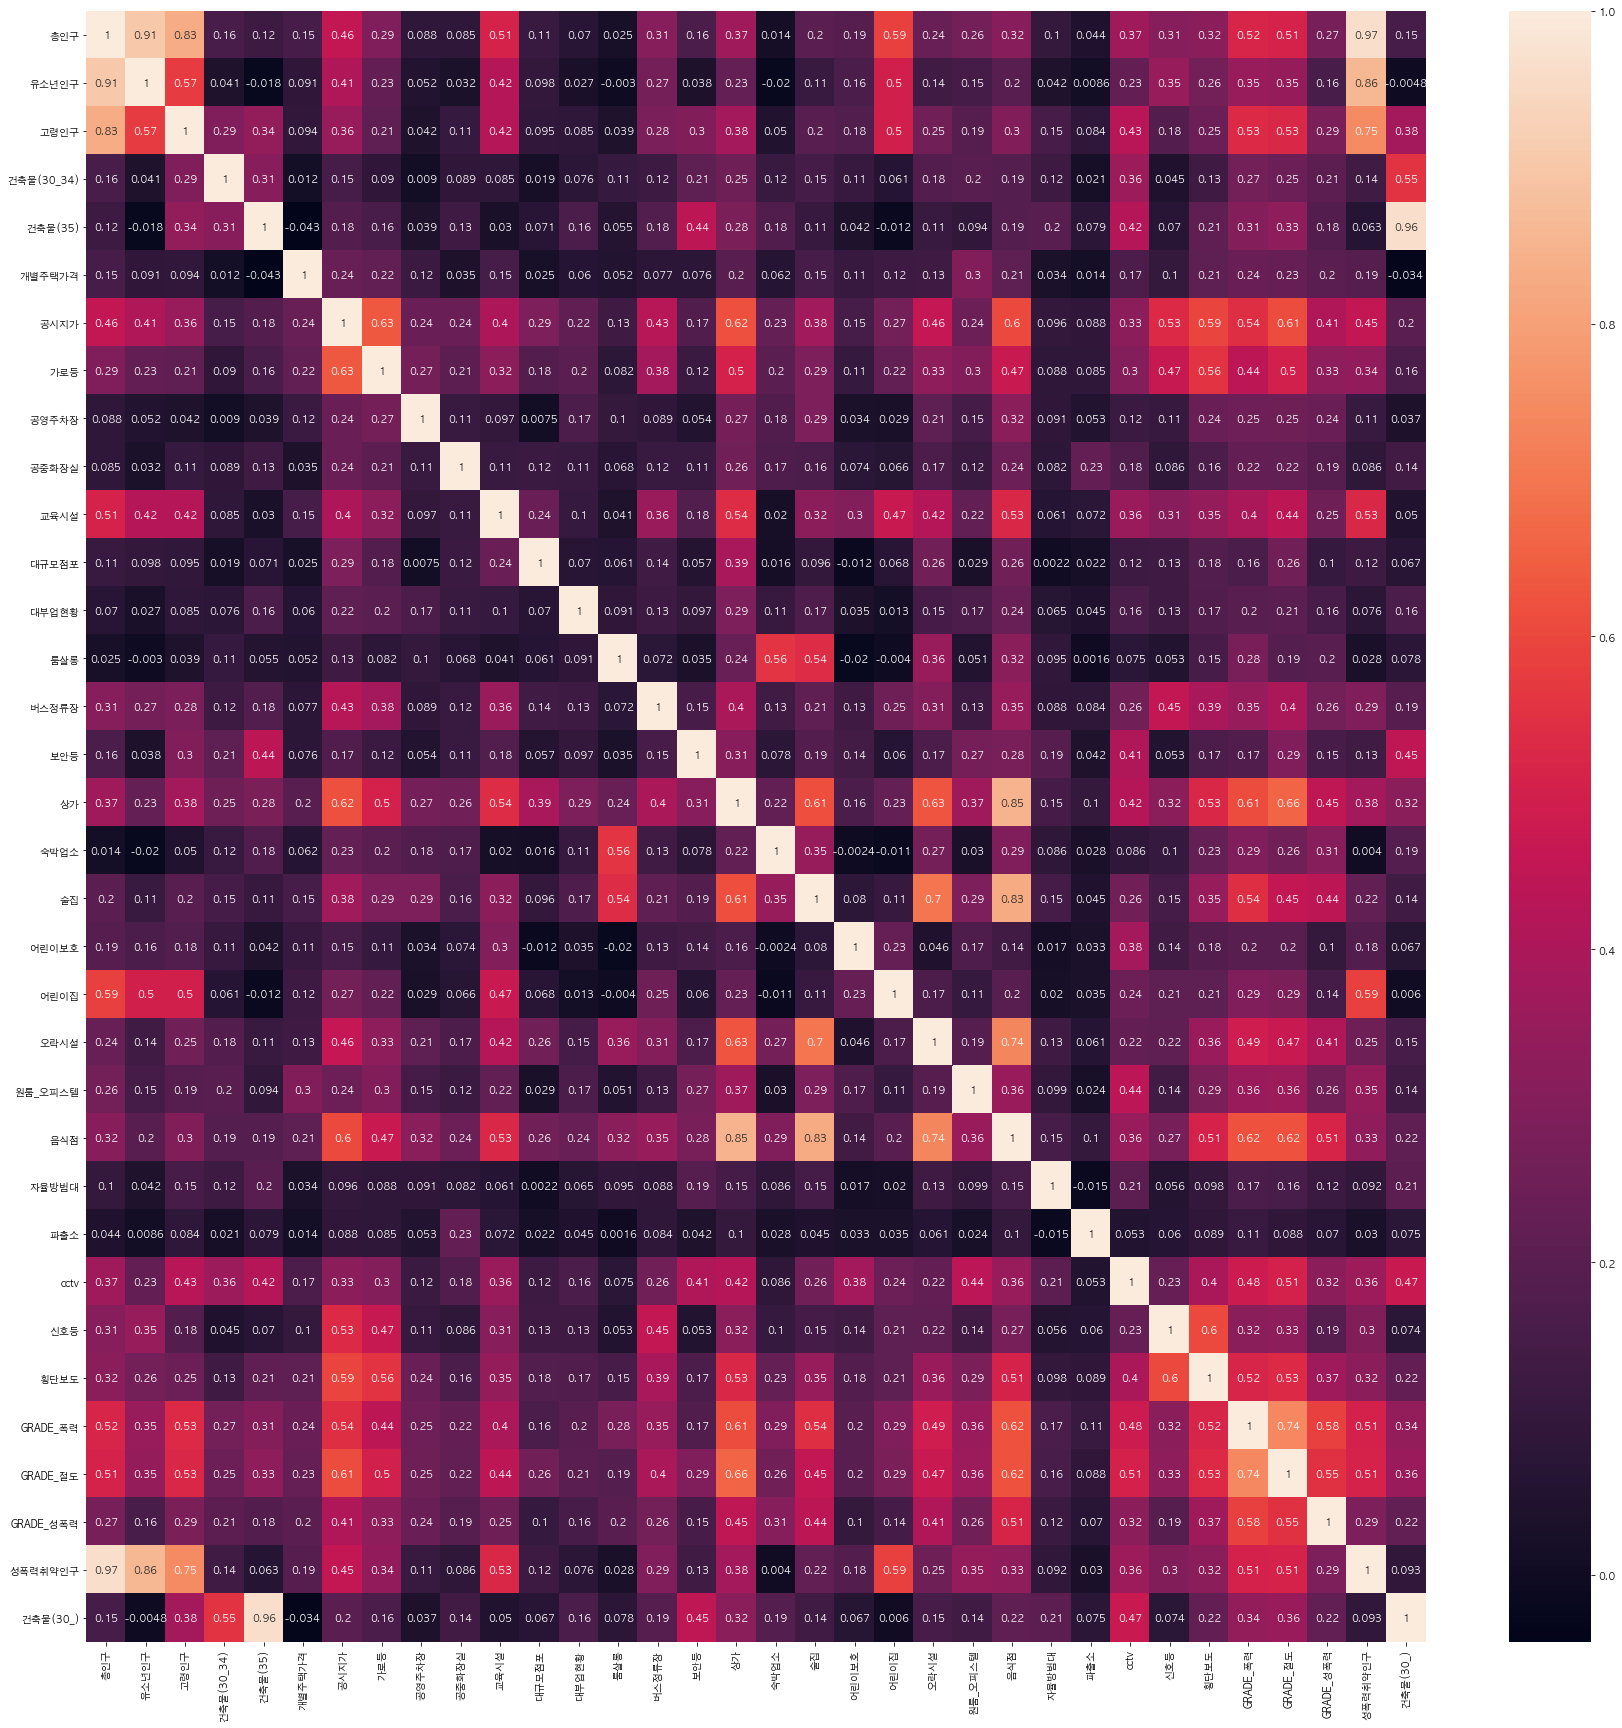

In [524]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_grid.corr(), annot=True)
plt.show()

### 전체 변수 간 상관관계 
 - 인구 사회학적 변수는 변수간 상관관계가 크며, 이는 다중공선성 제거를 위해 변수를 선택할 필요가 있다. 또한, 대부분 범죄 등급과도 큰 상관관계를 보이고 있다. 

#### 종속변수 (3대범죄)를 기반으로 한 상관계수 확인
 - 폭력
     - `인구` : 총인구 (0.52),성폭력취약인구(0.51), 유소년인구(0.35), 고령인구(0.53)
     - `토지` : 30년 이상35년 미만 건축물(0.27), 35년 이상건축물(0.31), 30년 이상 건축물 (0.34),개별주택가격 (0.24), 공시지가(0.54)
     - `시설물` : 가로등(0.44), 공영주차장(0.25), 공중화장실(0.22), 교육시설(0.4), 대규모점포(0.16), 대부업체현황(0.2), 룸살롱(0.28), 버스정류장(0.35), 보안등(0.17), 상가(0.61), 숙박업소(0.29), 술집(0.54), 어린이보호구역(0.2), 어린이집(0.29), 오락시설(0.49), 원룸_오피스텔(0.36), 음식점(0.62), 자율방범대(0.17), 파출소(0.11), cctv(0.48), 신호등(0.32), 횡단보도(0.52),
     - `다른 범죄` : 절도(0.74), 성폭력(0.58)

 - 절도
     - `인구` : 총인구 (0.51),성폭력취약인구(0.51), 유소년인구(0.35), 고령인구(0.53)
     - `토지` : 30년 이상35년 미만 건축물(0.25), 35년 이상건축물(0.33), 30년 이상 건축물 (0.36),개별주택가격 (0.34), 공시지가(0.61)
     - `시설물` : 가로등(0.5), 공영주차장(0.25), 공중화장실(0.22), 교육시설(0.44), 대규모점포(0.26), 대부업체현황(0.21), 룸살롱(0.19), 버스정류장(0.4), 보안등(0.29), 상가(0.66), 숙박업소(0.26), 술집(0.45), 어린이보호구역(0.2), 어린이집(0.29), 오락시설(0.47), 원룸_오피스텔(0.36), 음식점(0.62), 자율방범대(0.11), 파출소(0.01), cctv(0.51), 신호등(0.33), 횡단보도(0.53),
     - `다른 범죄` : 폭력(0.74), 성폭력(0.55)

 - 성폭력
     - `인구` : 총인구 (0.27),성폭력취약인구(0.29), 유소년인구(0.16), 고령인구(0.29)
     - `토지` : 30년 이상35년 미만 건축물(0.21), 35년 이상건축물(0.18), 30년 이상 건축물 (0.22),개별주택가격 (0.2), 공시지가(0.41)
     - `시설물` : 가로등(0.33), 공영주차장(0.24), 공중화장실(0.19), 교육시설(0.25), 대규모점포(0.1), 대부업체현황(0.16), 룸살롱(0.28), 버스정류장(0.26), 보안등(0.15), 상가(0.45), 숙박업소(0.31), 술집(0.44), 어린이보호구역(0.1), 어린이집(0.14), 오락시설(0.41), 원룸_오피스텔(0.26), 음식점(0.51), 자율방범대(0.12), 파출소(0.07), cctv(0.32), 신호등(0.19), 횡단보도(0.37),
     - `다른 범죄` : 절도(0.58), 성폭력(0.55)

### 폭력 범죄 발생지/미발생지 t-test

In [525]:
violence_Y = new_grid[new_grid['GRADE_폭력']>0]
violence_N = new_grid[new_grid['GRADE_폭력']==0]
print('폭력 발생지 로우 수 :',len(violence_Y),'폭력 미발생지 로우 수 :',len(violence_N))

폭력 발생지 로우 수 : 881 폭력 미발생지 로우 수 : 1157


x1_mean :  653.4233825198638 / x2_mean :  68.81071737251513


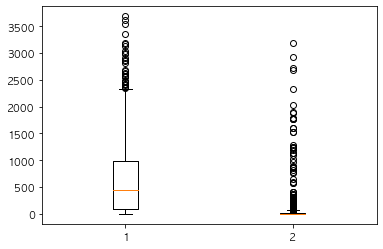

LeveneResult(statistic=630.6174961805651, pvalue=1.8521074513482068e-121)


Ttest_indResult(statistic=23.31562829588057, pvalue=5.705550331021199e-98)

In [526]:
x1 = np.array(violence_Y['총인구'])
x2 = np.array(violence_N['총인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['총인구']), np.array(violence_N['총인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['총인구']), np.array(violence_N['총인구']), equal_var=False)

##### 총인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  53.751418842224744 / x2_mean :  3.9282627484874677


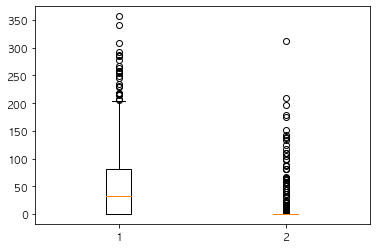

LeveneResult(statistic=706.9280499928796, pvalue=5.953937003980363e-134)


Ttest_indResult(statistic=22.50883935346372, pvalue=1.4341170365572102e-91)

In [527]:
x1 = np.array(violence_Y['성폭력취약인구'])
x2 = np.array(violence_N['성폭력취약인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['성폭력취약인구']), np.array(violence_N['성폭력취약인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['성폭력취약인구']), np.array(violence_N['성폭력취약인구']), equal_var=False)

##### 성폭력 취약인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  71.41657207718502 / x2_mean :  10.557476231633535


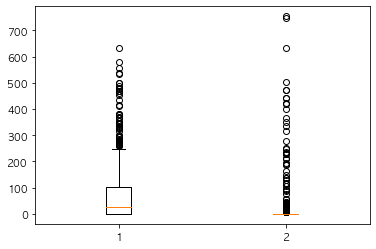

LeveneResult(statistic=255.3097855811734, pvalue=3.1101266983759085e-54)


Ttest_indResult(statistic=15.620425687686074, pvalue=1.157222657582151e-50)

In [528]:
x1 = np.array(violence_Y['유소년인구'])
x2 = np.array(violence_N['유소년인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['유소년인구']), np.array(violence_N['유소년인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['유소년인구']), np.array(violence_N['유소년인구']), equal_var=False)

##### 유소년 취약인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  113.8422247446084 / x2_mean :  9.855661192739845


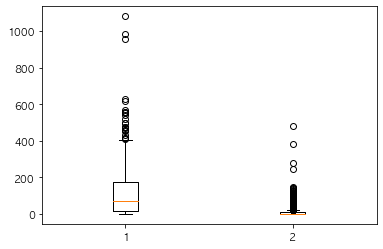

LeveneResult(statistic=688.4483322370056, pvalue=5.85809740877868e-131)


Ttest_indResult(statistic=23.68717376674369, pvalue=8.668519108707626e-98)

In [529]:
x1 = np.array(violence_Y['고령인구'])
x2 = np.array(violence_N['고령인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['고령인구']), np.array(violence_N['고령인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['고령인구']), np.array(violence_N['고령인구']), equal_var=False)

##### 고령인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  5.316685584562997 / x2_mean :  0.38461538461538464


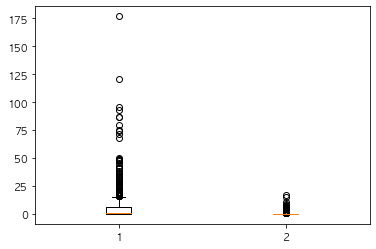

LeveneResult(statistic=172.7584809419383, pvalue=6.183744087405323e-38)


Ttest_indResult(statistic=11.182956137344513, pvalue=2.92649856556718e-27)

In [530]:
x1 = np.array(violence_Y['건축물(30_34)'])
x2 = np.array(violence_N['건축물(30_34)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(30_34)']), np.array(violence_N['건축물(30_34)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(30_34)']), np.array(violence_N['건축물(30_34)']), equal_var=False)

##### 건축물(30~34년) 유의한 차이를 보인다

x1_mean :  22.2360953461975 / x2_mean :  2.536732929991357


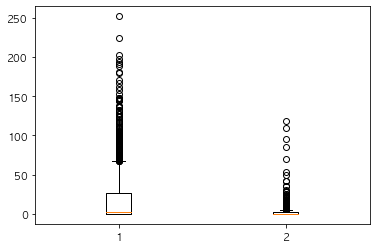

LeveneResult(statistic=276.8242353516493, pvalue=2.2155952219160905e-58)


Ttest_indResult(statistic=14.544541630235175, pvalue=2.3655989326505094e-43)

In [531]:
x1 = np.array(violence_Y['건축물(35)'])
x2 = np.array(violence_N['건축물(35)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(35)']), np.array(violence_N['건축물(35)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(35)']), np.array(violence_N['건축물(35)']), equal_var=False)

##### 35년이상 건축물 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  27.5527809307605 / x2_mean :  2.9213483146067416


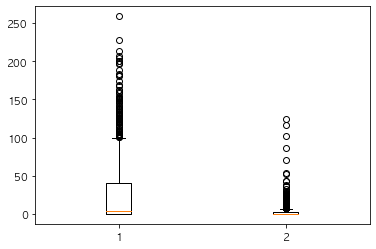

LeveneResult(statistic=350.7828581490364, pvalue=2.425984736637258e-72)


Ttest_indResult(statistic=16.16822278549921, pvalue=5.3712202881339736e-52)

In [532]:
x1 = np.array(violence_Y['건축물(30_)'])
x2 = np.array(violence_N['건축물(30_)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(30_)']), np.array(violence_N['건축물(30_)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(30_)']), np.array(violence_N['건축물(30_)']), equal_var=False)

##### 30년이상 건축물에서 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  153276168.86833143 / x2_mean :  77909735.4883319


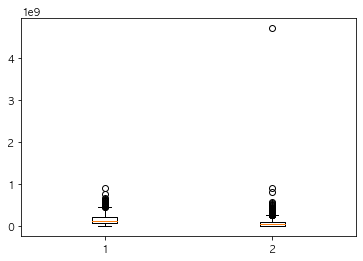

LeveneResult(statistic=37.91540040063005, pvalue=8.875870338290034e-10)


Ttest_indResult(statistic=11.254687453928026, pvalue=1.5251471906193718e-28)

In [533]:
x1 = np.array(violence_Y['개별주택가격'])
x2 = np.array(violence_N['개별주택가격'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['개별주택가격']), np.array(violence_N['개별주택가격'])))
scipy.stats.ttest_ind(np.array(violence_Y['개별주택가격']), np.array(violence_N['개별주택가격']), equal_var=False)

##### 개별주택가격에서 유의한 차이를 보인다. (2배정도)

x1_mean :  541687.1191827469 / x2_mean :  142005.3794295592


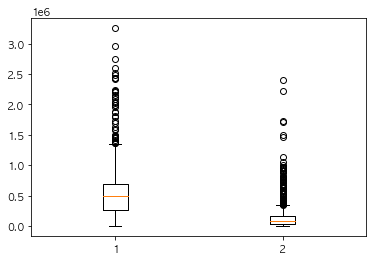

LeveneResult(statistic=248.53315472615907, pvalue=6.41844583470993e-53)


Ttest_indResult(statistic=25.507344880155433, pvalue=4.377028931336266e-115)

In [534]:
x1 = np.array(violence_Y['공시지가'])
x2 = np.array(violence_N['공시지가'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공시지가']), np.array(violence_N['공시지가'])))
scipy.stats.ttest_ind(np.array(violence_Y['공시지가']), np.array(violence_N['공시지가']), equal_var=False)

##### 가로등수에서도 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  0.08286038592508513 / x2_mean :  0.006050129645635264


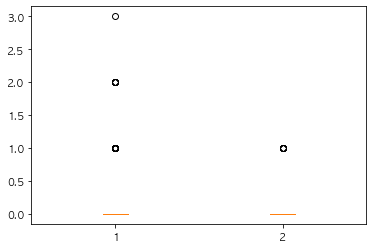

LeveneResult(statistic=63.975665075297265, pvalue=2.092746878088575e-15)


Ttest_indResult(statistic=7.090314448539257, pvalue=2.589021983527182e-12)

In [535]:
x1 = np.array(violence_Y['공영주차장'])
x2 = np.array(violence_N['공영주차장'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공영주차장']), np.array(violence_N['공영주차장'])))
scipy.stats.ttest_ind(np.array(violence_Y['공영주차장']), np.array(violence_N['공영주차장']), equal_var=False)

In [536]:
len(new_grid[new_grid['공영주차장']>0])

71

##### 공영주차장에서도 차이를 보인다 할 수 있으나, 주차장 자체가 많지 않다.

x1_mean :  0.29511918274687854 / x2_mean :  0.055315471045808126


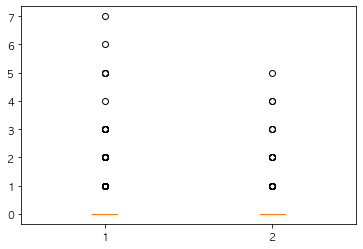

LeveneResult(statistic=94.491548969382, pvalue=7.292662100961811e-22)


Ttest_indResult(statistic=8.897140100271358, pvalue=2.1495193567957458e-18)

In [537]:
x1 = np.array(violence_Y['공중화장실'])
x2 = np.array(violence_N['공중화장실'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공중화장실']), np.array(violence_N['공중화장실'])))
scipy.stats.ttest_ind(np.array(violence_Y['공중화장실']), np.array(violence_N['공중화장실']), equal_var=False)

In [538]:
len(new_grid[new_grid['공중화장실']>0])

214

##### 공중화장실 수에서 유의한 차이를 보인다. 하지만 큰 차이가 있다고 보기 어려울 것 같다.   

x1_mean :  4.039727582292849 / x2_mean :  0.11668107173725151


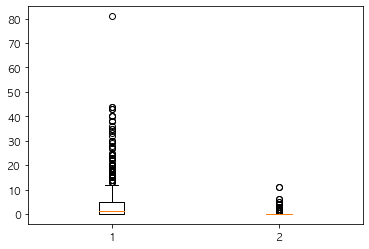

LeveneResult(statistic=310.9469773817554, pvalue=7.054375203946592e-65)


Ttest_indResult(statistic=15.244054321921706, pvalue=8.531168391294286e-47)

In [539]:
x1 = np.array(violence_Y['교육시설'])
x2 = np.array(violence_N['교육시설'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['교육시설']), np.array(violence_N['교육시설'])))
scipy.stats.ttest_ind(np.array(violence_Y['교육시설']), np.array(violence_N['교육시설']), equal_var=False)

##### 교육시설 수에서 유의한 차이를 보인다. 

x1_mean :  0.043132803632236094 / x2_mean :  0.0


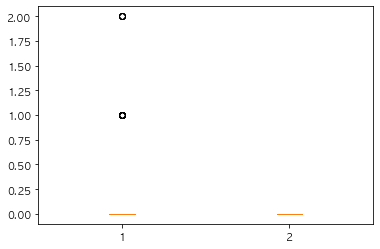

LeveneResult(statistic=40.86447075634436, pvalue=2.0172650861130595e-10)


Ttest_indResult(statistic=5.577772527771285, pvalue=3.242169807167729e-08)

In [540]:
x1 = np.array(violence_Y['대규모점포'])
x2 = np.array(violence_N['대규모점포'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['대규모점포']), np.array(violence_N['대규모점포'])))
scipy.stats.ttest_ind(np.array(violence_Y['대규모점포']), np.array(violence_N['대규모점포']), equal_var=False)

#### 폭력사건은 대규모 점포가 있는 격자에서만 발생했다.

x1_mean :  0.09648127128263337 / x2_mean :  0.001728608470181504


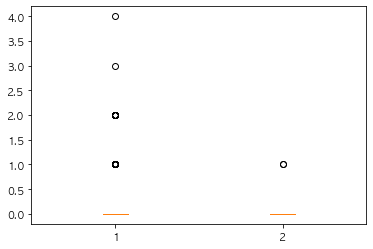

LeveneResult(statistic=75.68581094185167, pvalue=6.728137440461043e-18)


Ttest_indResult(statistic=7.6174395495626355, pvalue=6.562955990391309e-14)

In [541]:
x1 = np.array(violence_Y['대부업현황'])
x2 = np.array(violence_N['대부업현황'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['대부업현황']), np.array(violence_N['대부업현황'])))
scipy.stats.ttest_ind(np.array(violence_Y['대부업현황']), np.array(violence_N['대부업현황']), equal_var=False)

x1_mean :  0.5402951191827469 / x2_mean :  0.08038029386343994


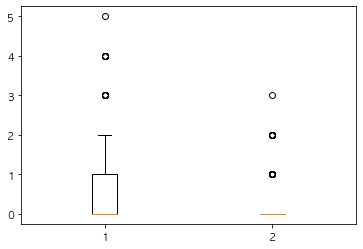

LeveneResult(statistic=287.06297109282997, pvalue=2.430719371694712e-60)


Ttest_indResult(statistic=15.3601749151792, pvalue=2.2364915913172147e-48)

In [542]:
x1 = np.array(violence_Y['버스정류장'])
x2 = np.array(violence_N['버스정류장'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['버스정류장']), np.array(violence_N['버스정류장'])))
scipy.stats.ttest_ind(np.array(violence_Y['버스정류장']), np.array(violence_N['버스정류장']), equal_var=False)

#### 비교적 버스정류장이 있는 곳에서 범죄가 발생했다

x1_mean :  8.503972758229285 / x2_mean :  2.171132238547969


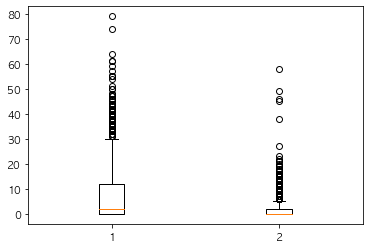

LeveneResult(statistic=234.74324643473193, pvalue=3.127332909090005e-50)


Ttest_indResult(statistic=13.483013426779547, pvalue=2.3782780273689913e-38)

In [543]:
x1 = np.array(violence_Y['보안등'])
x2 = np.array(violence_N['보안등'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['보안등']), np.array(violence_N['보안등'])))
scipy.stats.ttest_ind(np.array(violence_Y['보안등']), np.array(violence_N['보안등']), equal_var=False)

#### 비교적 버스정류장이 있는 곳에서 범죄가 발생했다

x1_mean :  35.894438138479 / x2_mean :  1.8202247191011236


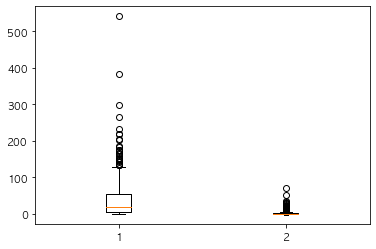

LeveneResult(statistic=590.871763537854, pvalue=8.274486880897929e-115)


Ttest_indResult(statistic=22.399888596314053, pvalue=1.513449861814134e-88)

In [544]:
x1 = np.array(violence_Y['상가'])
x2 = np.array(violence_N['상가'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['상가']), np.array(violence_N['상가'])))
scipy.stats.ttest_ind(np.array(violence_Y['상가']), np.array(violence_N['상가']), equal_var=False)

#### 상가수에는 꽤 큰 차이를 보인다

x1_mean :  0.4426787741203178 / x2_mean :  0.019878997407087293


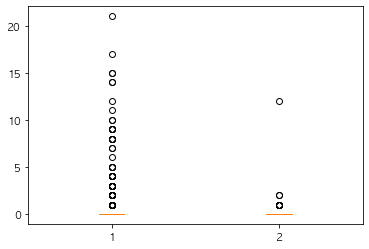

LeveneResult(statistic=55.46605431292107, pvalue=1.396529645880303e-13)


Ttest_indResult(statistic=6.56532656541147, pvalue=8.61090023786731e-11)

In [545]:
x1 = np.array(violence_Y['숙박업소'])
x2 = np.array(violence_N['숙박업소'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['숙박업소']), np.array(violence_N['숙박업소'])))
scipy.stats.ttest_ind(np.array(violence_Y['숙박업소']), np.array(violence_N['숙박업소']), equal_var=False)

x1_mean :  1.5788876276958002 / x2_mean :  0.024200518582541054


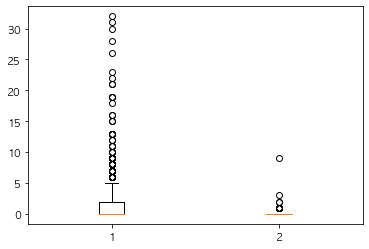

LeveneResult(statistic=201.1199834460131, pvalue=1.319997485600776e-43)


Ttest_indResult(statistic=12.397450531949964, pvalue=1.136036689108353e-32)

In [546]:
x1 = np.array(violence_Y['술집'])
x2 = np.array(violence_N['술집'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['술집']), np.array(violence_N['술집'])))
scipy.stats.ttest_ind(np.array(violence_Y['술집']), np.array(violence_N['술집']), equal_var=False)

x1_mean :  0.2133938706015891 / x2_mean :  0.049265341400172864


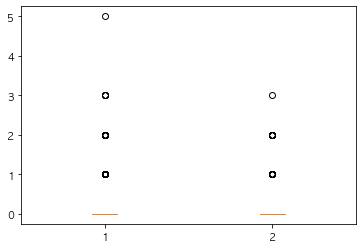

LeveneResult(statistic=77.4742160917047, pvalue=2.8110068334379582e-18)


Ttest_indResult(statistic=8.08464936338632, pvalue=1.5244959294476502e-15)

In [547]:
x1 = np.array(violence_Y['어린이보호'])
x2 = np.array(violence_N['어린이보호'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['어린이보호']), np.array(violence_N['어린이보호'])))
scipy.stats.ttest_ind(np.array(violence_Y['어린이보호']), np.array(violence_N['어린이보호']), equal_var=False)

x1_mean :  0.6072644721906924 / x2_mean :  0.06136560069144339


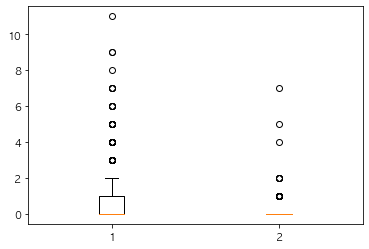

LeveneResult(statistic=186.31639787959043, pvalue=1.1772093715647592e-40)


Ttest_indResult(statistic=12.148540271986205, pvalue=9.615992574860679e-32)

In [548]:
x1 = np.array(violence_Y['어린이집'])
x2 = np.array(violence_N['어린이집'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['어린이집']), np.array(violence_N['어린이집'])))
scipy.stats.ttest_ind(np.array(violence_Y['어린이집']), np.array(violence_N['어린이집']), equal_var=False)

x1_mean :  0.9182746878547106 / x2_mean :  0.014693171996542784


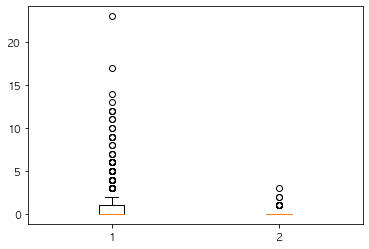

LeveneResult(statistic=218.97385709513884, pvalue=3.8871230777409566e-47)


Ttest_indResult(statistic=12.930878416504262, pvalue=3.6371834016066037e-35)

In [549]:
x1 = np.array(violence_Y['오락시설'])
x2 = np.array(violence_N['오락시설'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['오락시설']), np.array(violence_N['오락시설'])))
scipy.stats.ttest_ind(np.array(violence_Y['오락시설']), np.array(violence_N['오락시설']), equal_var=False)

x1_mean :  9.488081725312146 / x2_mean :  0.324114088159032


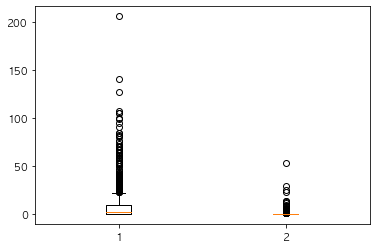

LeveneResult(statistic=265.04236042320855, pvalue=4.089756334257251e-56)


Ttest_indResult(statistic=14.104938319158764, pvalue=5.860202811601118e-41)

In [550]:
x1 = np.array(violence_Y['원룸_오피스텔'])
x2 = np.array(violence_N['원룸_오피스텔'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['원룸_오피스텔']), np.array(violence_N['원룸_오피스텔'])))
scipy.stats.ttest_ind(np.array(violence_Y['원룸_오피스텔']), np.array(violence_N['원룸_오피스텔']), equal_var=False)

x1_mean :  12.779795686719638 / x2_mean :  0.5851339671564391


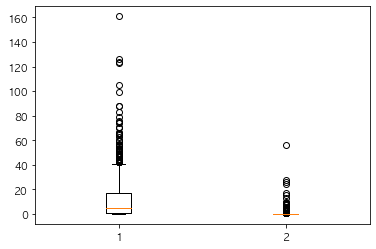

LeveneResult(statistic=476.3454977047109, pvalue=4.5988802500113914e-95)


Ttest_indResult(statistic=19.550444023126627, pvalue=2.8541015115632734e-71)

In [551]:
x1 = np.array(violence_Y['음식점'])
x2 = np.array(violence_N['음식점'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['음식점']), np.array(violence_N['음식점'])))
scipy.stats.ttest_ind(np.array(violence_Y['음식점']), np.array(violence_N['음식점']), equal_var=False)

x1_mean :  0.04767309875141884 / x2_mean :  0.005185825410544511


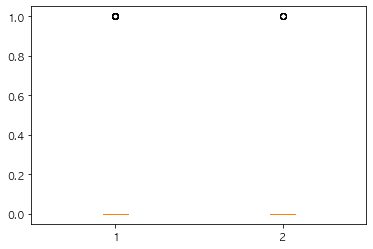

LeveneResult(statistic=39.990612923793506, pvalue=3.1276574747799904e-10)


Ttest_indResult(statistic=5.674861281879838, pvalue=1.8020710156360002e-08)

In [552]:
x1 = np.array(violence_Y['자율방범대'])
x2 = np.array(violence_N['자율방범대'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['자율방범대']), np.array(violence_N['자율방범대'])))
scipy.stats.ttest_ind(np.array(violence_Y['자율방범대']), np.array(violence_N['자율방범대']), equal_var=False)

x1_mean :  0.021566401816118047 / x2_mean :  0.0


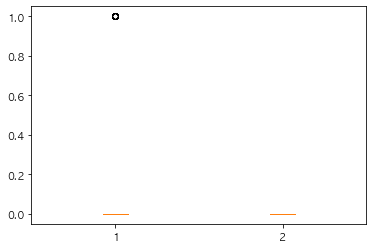

LeveneResult(statistic=25.47729337483406, pvalue=4.874135762325902e-07)


Ttest_indResult(statistic=4.4041743539668365, pvalue=1.1925303172605495e-05)

In [553]:
x1 = np.array(violence_Y['파출소'])
x2 = np.array(violence_N['파출소'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['파출소']), np.array(violence_N['파출소'])))
scipy.stats.ttest_ind(np.array(violence_Y['파출소']), np.array(violence_N['파출소']), equal_var=False)

x1_mean :  1.2780930760499432 / x2_mean :  0.18668971477960242


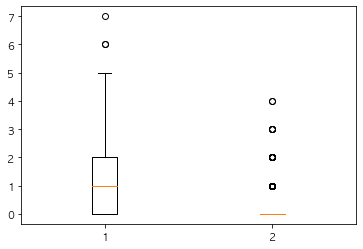

LeveneResult(statistic=684.2021687717303, pvalue=2.873056453068963e-130)


Ttest_indResult(statistic=22.500149826512036, pvalue=7.245008611438394e-92)

In [554]:
x1 = np.array(violence_Y['cctv'])
x2 = np.array(violence_N['cctv'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['cctv']), np.array(violence_N['cctv'])))
scipy.stats.ttest_ind(np.array(violence_Y['cctv']), np.array(violence_N['cctv']), equal_var=False)

x1_mean :  3.3200908059023835 / x2_mean :  0.7579948141745895


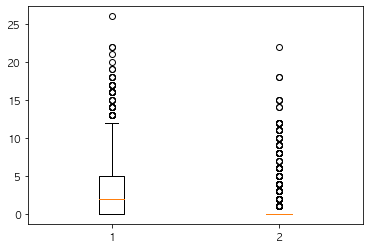

LeveneResult(statistic=377.23222148604196, pvalue=3.1566360829127477e-77)


Ttest_indResult(statistic=15.81134206828599, pvalue=1.430987374352228e-51)

In [555]:
x1 = np.array(violence_Y['신호등'])
x2 = np.array(violence_N['신호등'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['신호등']), np.array(violence_N['신호등'])))
scipy.stats.ttest_ind(np.array(violence_Y['신호등']), np.array(violence_N['신호등']), equal_var=False)

x1_mean :  6.451759364358684 / x2_mean :  1.0259291270527227


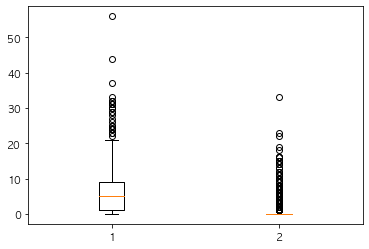

LeveneResult(statistic=488.63504081265484, pvalue=3.1682129753493154e-97)


Ttest_indResult(statistic=22.201592118439642, pvalue=1.0217885781138099e-90)

In [556]:
x1 = np.array(violence_Y['횡단보도'])
x2 = np.array(violence_N['횡단보도'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['횡단보도']), np.array(violence_N['횡단보도'])))
scipy.stats.ttest_ind(np.array(violence_Y['횡단보도']), np.array(violence_N['횡단보도']), equal_var=False)

In [557]:
numerical_feats = new_grid.dtypes[new_grid.dtypes != "object"].index.tolist()
numerical_feats.remove('GRADE_폭력')
numerical_feats.remove('GRADE_절도')
numerical_feats.remove('GRADE_성폭력')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = new_grid.dtypes[new_grid.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  31
Number of Categorical features:  2


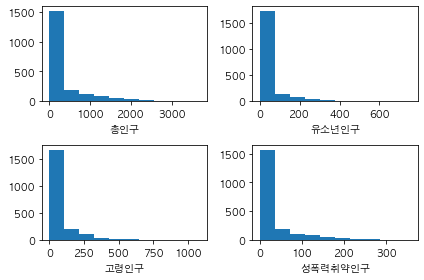

In [558]:
plt.subplot(221)
plt.hist(new_grid['총인구'])
plt.xlabel('총인구')

plt.subplot(222)
plt.hist(new_grid['유소년인구'])
plt.xlabel('유소년인구')

plt.subplot(223)
plt.hist(new_grid['고령인구'])
plt.xlabel('고령인구')

plt.subplot(224)
plt.hist(new_grid['성폭력취약인구'])
plt.xlabel('성폭력취약인구')

plt.tight_layout()
plt.show()

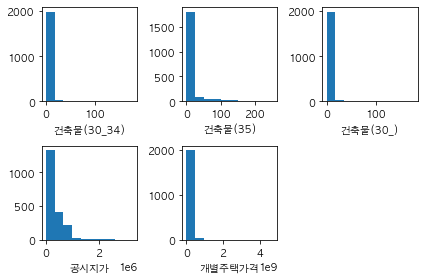

In [559]:
plt.subplot(231)
plt.hist(new_grid['건축물(30_34)'])
plt.xlabel('건축물(30_34)')

plt.subplot(232)
plt.hist(new_grid['건축물(35)'])
plt.xlabel('건축물(35)')

plt.subplot(233)
plt.hist(new_grid['건축물(30_34)'])
plt.xlabel('건축물(30_)')

plt.subplot(234)
plt.hist(new_grid['공시지가'])
plt.xlabel('공시지가')

plt.subplot(235)
plt.hist(new_grid['개별주택가격'])
plt.xlabel('개별주택가격')

plt.tight_layout()
plt.show()

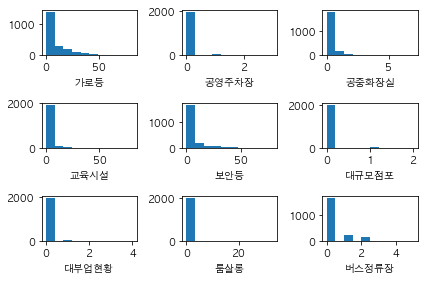

In [560]:
plt.subplot(331)
plt.hist(new_grid['가로등'])
plt.xlabel('가로등')

plt.subplot(332)
plt.hist(new_grid['공영주차장'])
plt.xlabel('공영주차장')

plt.subplot(333)
plt.hist(new_grid['공중화장실'])
plt.xlabel('공중화장실')

plt.subplot(334)
plt.hist(new_grid['교육시설'])
plt.xlabel('교육시설')

plt.subplot(335)
plt.hist(new_grid['보안등'])
plt.xlabel('보안등')

plt.subplot(336)
plt.hist(new_grid['대규모점포'])
plt.xlabel('대규모점포')

plt.subplot(337)
plt.hist(new_grid['대부업현황'])
plt.xlabel('대부업현황')

plt.subplot(338)
plt.hist(new_grid['룸살롱'])
plt.xlabel('룸살롱')

plt.subplot(339)
plt.hist(new_grid['버스정류장'])
plt.xlabel('버스정류장')

plt.tight_layout()
plt.show()

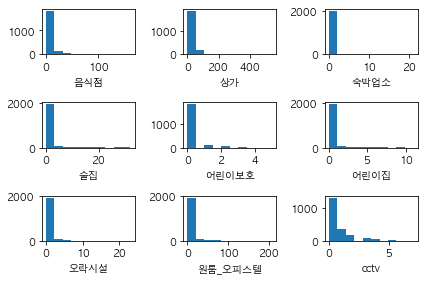

In [561]:
plt.subplot(331)
plt.hist(new_grid['음식점'])
plt.xlabel('음식점')

plt.subplot(332)
plt.hist(new_grid['상가'])
plt.xlabel('상가')

plt.subplot(333)
plt.hist(new_grid['숙박업소'])
plt.xlabel('숙박업소')

plt.subplot(334)
plt.hist(new_grid['술집'])
plt.xlabel('술집')

plt.subplot(335)
plt.hist(new_grid['어린이보호'])
plt.xlabel('어린이보호')

plt.subplot(336)
plt.hist(new_grid['어린이집'])
plt.xlabel('어린이집')

plt.subplot(337)
plt.hist(new_grid['오락시설'])
plt.xlabel('오락시설')

plt.subplot(338)
plt.hist(new_grid['원룸_오피스텔'])
plt.xlabel('원룸_오피스텔')

plt.subplot(339)
plt.hist(new_grid['cctv'])
plt.xlabel('cctv')

plt.tight_layout()
plt.show()

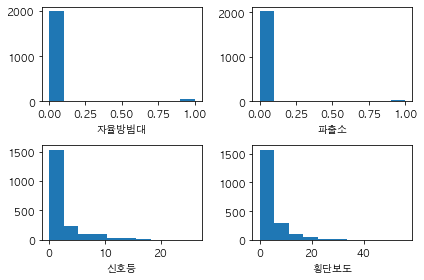

In [562]:
plt.subplot(221)
plt.hist(new_grid['자율방범대'])
plt.xlabel('자율방범대')

plt.subplot(222)
plt.hist(new_grid['파출소'])
plt.xlabel('파출소')

plt.subplot(223)
plt.hist(new_grid['신호등'])
plt.xlabel('신호등')

plt.subplot(224)
plt.hist(new_grid['횡단보도'])
plt.xlabel('횡단보도')

plt.tight_layout()
plt.show()

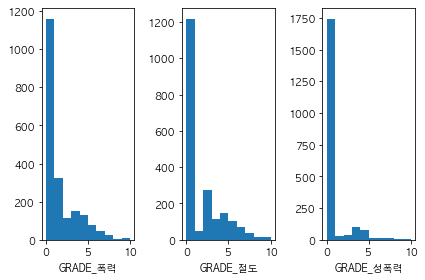

In [563]:
plt.subplot(131)
plt.hist(new_grid['GRADE_폭력'])
plt.xlabel('GRADE_폭력')

plt.subplot(132)
plt.hist(new_grid['GRADE_절도'])
plt.xlabel('GRADE_절도')

plt.subplot(133)
plt.hist(new_grid['GRADE_성폭력'])
plt.xlabel('GRADE_성폭력')

plt.tight_layout()
plt.show()

In [564]:
feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력']).columns)
feature = new_grid[feature_list]
target = new_grid[['GRADE_폭력']]

In [565]:
# for b0, 상수항 추가
X = sm.add_constant(feature, has_constant = "add")
y = target
# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     117.7
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:13:14   Log-Likelihood:                -3135.8
No. Observations:                2038   AIC:                             6334.
Df Residuals:                    2007   BIC:                             6508.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1296      0.038      3.396      0.001       0.055       0.204
총인구            0.0039      0.001      6.217      0.000       0.003       0.005
유소년인구         -0.0107      0.002     -6.194      0.000      -0.014      -0.007
고령인구          -0.0024      0.001     -1.995      0.046      -0.005   -4.08e-05
건축물(30_34)     0.0009      0.002      0.392      0.695      -0.003       0.005
건축물(35)        0.0032      0.001      2.285      0.022       0.000       0.006
개별주택가격      6.782e-10   1.74e-10      3.908      0.000    3.38e-10    1.02e-09
공시지가        2.721e-07   1.14e-07      2.396      0.017    4.94e-08    4.95e-07
가로등            0.0050      0.003      1.522      0.128      -0.001       0.011
공영주차장          0.2225      0.127      1.754      0.080      -0.026       0.471
공중화장실          0.0768      0.048      1.589      0.112      -0.018       0.172
교육시설          -0.0121      0.007     -1.725      0.085      -0.026       0.002
대규모점포          0.0066      0.192      0.034      0.973      -0.370       0.383
대부업현황          0.0168      0.108      0.156      0.876      -0.195       0.229
룸살롱            0.0301      0.026      1.175      0.240      -0.020       0.080
버스정류장          0.0771      0.047      1.632      0.103      -0.016       0.170
보안등           -0.0308      0.003    -10.062      0.000      -0.037      -0.025
상가             0.0034      0.002      2.049      0.041       0.000       0.007
숙박업소           0.1061      0.025      4.214      0.000       0.057       0.155
술집             0.1283      0.023      5.575      0.000       0.083       0.173
어린이보호          0.1340      0.067      1.987      0.047       0.002       0.266
어린이집          -0.0631      0.036     -1.767      0.077      -0.133       0.007
오락시설           0.0309      0.028      1.101      0.271      -0.024       0.086
원룸_오피스텔        0.0061      0.003      2.453      0.014       0.001       0.011
음식점            0.0127      0.006      2.159      0.031       0.001       0.024
자율방범대          0.1271      0.174      0.731      0.465      -0.214       0.468
파출소            0.4961      0.272      1.826      0.068      -0.037       1.029
cctv           0.1873      0.033      5.638      0.000       0.122       0.253
신호등            0.0030      0.010      0.296      0.767      -0.017       0.023
횡단보도           0.0356      0.007      5.242      0.000       0.022       0.049
성폭력취약인구       -0.0131      0.003     -3.982      0.000      -0.019      -0.007
건축물(30_)       0.0040      0.001      3.645      0.000       0.002       0.006
==============================================================================
Omnibus:                      493.469   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1652.897
Skew:                           1.186   Prob(JB):                         0.00
Ku

In [566]:
#다중공선성확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature.columns 
vif

,VIF Factor,features
0,273.166068,총인구
1,41.949056,유소년인구
2,30.486256,고령인구
3,inf,건축물(30_34)
4,inf,건축물(35)
5,1.559057,개별주택가격
6,4.668244,공시지가
7,2.952807,가로등
8,1.246510,공영주차장
9,1.262990,공중화장실


In [567]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.
# 다중 선형회귀분석

X = sm.add_constant(feature, has_constant = "add")
y = target

def processSubset(X,y):
    model = sm.OLS(y,X) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
processSubset(X = X, y = target)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fa117ce52b0>,
 'AIC': 6333.532082196474}

In [568]:
X = feature
y = target

selected_variables = [] ## 선택된 변수들

sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(feature) > 0:
    remainder = list(set(feature) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(target,sm.add_constant(feature[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [569]:
selected_variables

['음식점',
 '고령인구',
 '횡단보도',
 '숙박업소',
 'cctv',
 '보안등',
 '술집',
 '원룸_오피스텔',
 '건축물(30_)',
 '공시지가',
 '개별주택가격',
 '총인구',
 '유소년인구',
 '성폭력취약인구',
 '상가',
 '파출소',
 '공영주차장']

In [570]:
# 다중 선형회귀분석
x_data = new_grid[selected_variables]
y = target

# for b0, 상수항 추가
X = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     205.7
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:13:17   Log-Likelihood:                -3146.0
No. Observations:                2038   AIC:                             6328.
Df Residuals:                    2020   BIC:                             6429.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1442      0.038      3.817      0.000       0.070       0.218
음식점            0.0098      0.005      1.830      0.067      -0.001       0.020
고령인구          -0.0022      0.001     -1.847      0.065      -0.005       0.000
횡단보도           0.0395      0.006      6.599      0.000       0.028       0.051
숙박업소           0.1299      0.022      5.958      0.000       0.087       0.173
cctv           0.1987      0.031      6.441      0.000       0.138       0.259
보안등           -0.0307      0.003    -10.129      0.000      -0.037      -0.025
술집             0.1490      0.019      7.770      0.000       0.111       0.187
원룸_오피스텔        0.0069      0.002      2.856      0.004       0.002       0.012
건축물(30_)       0.0073      0.001      6.933      0.000       0.005       0.009
공시지가        4.067e-07   1.02e-07      3.987      0.000    2.07e-07    6.07e-07
개별주택가격      6.674e-10   1.73e-10      3.858      0.000    3.28e-10    1.01e-09
총인구            0.0037      0.001      5.992      0.000       0.002       0.005
유소년인구         -0.0103      0.002     -6.029      0.000      -0.014      -0.007
성폭력취약인구       -0.0131      0.003     -4.054      0.000      -0.019      -0.007
상가             0.0040      0.002      2.583      0.010       0.001       0.007
파출소            0.6017      0.266      2.265      0.024       0.081       1.123
공영주차장          0.2535      0.124      2.038      0.042       0.010       0.497
==============================================================================
Omnibus:                      497.733   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1696.759
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       6.783   Cond. No.                     2.03e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

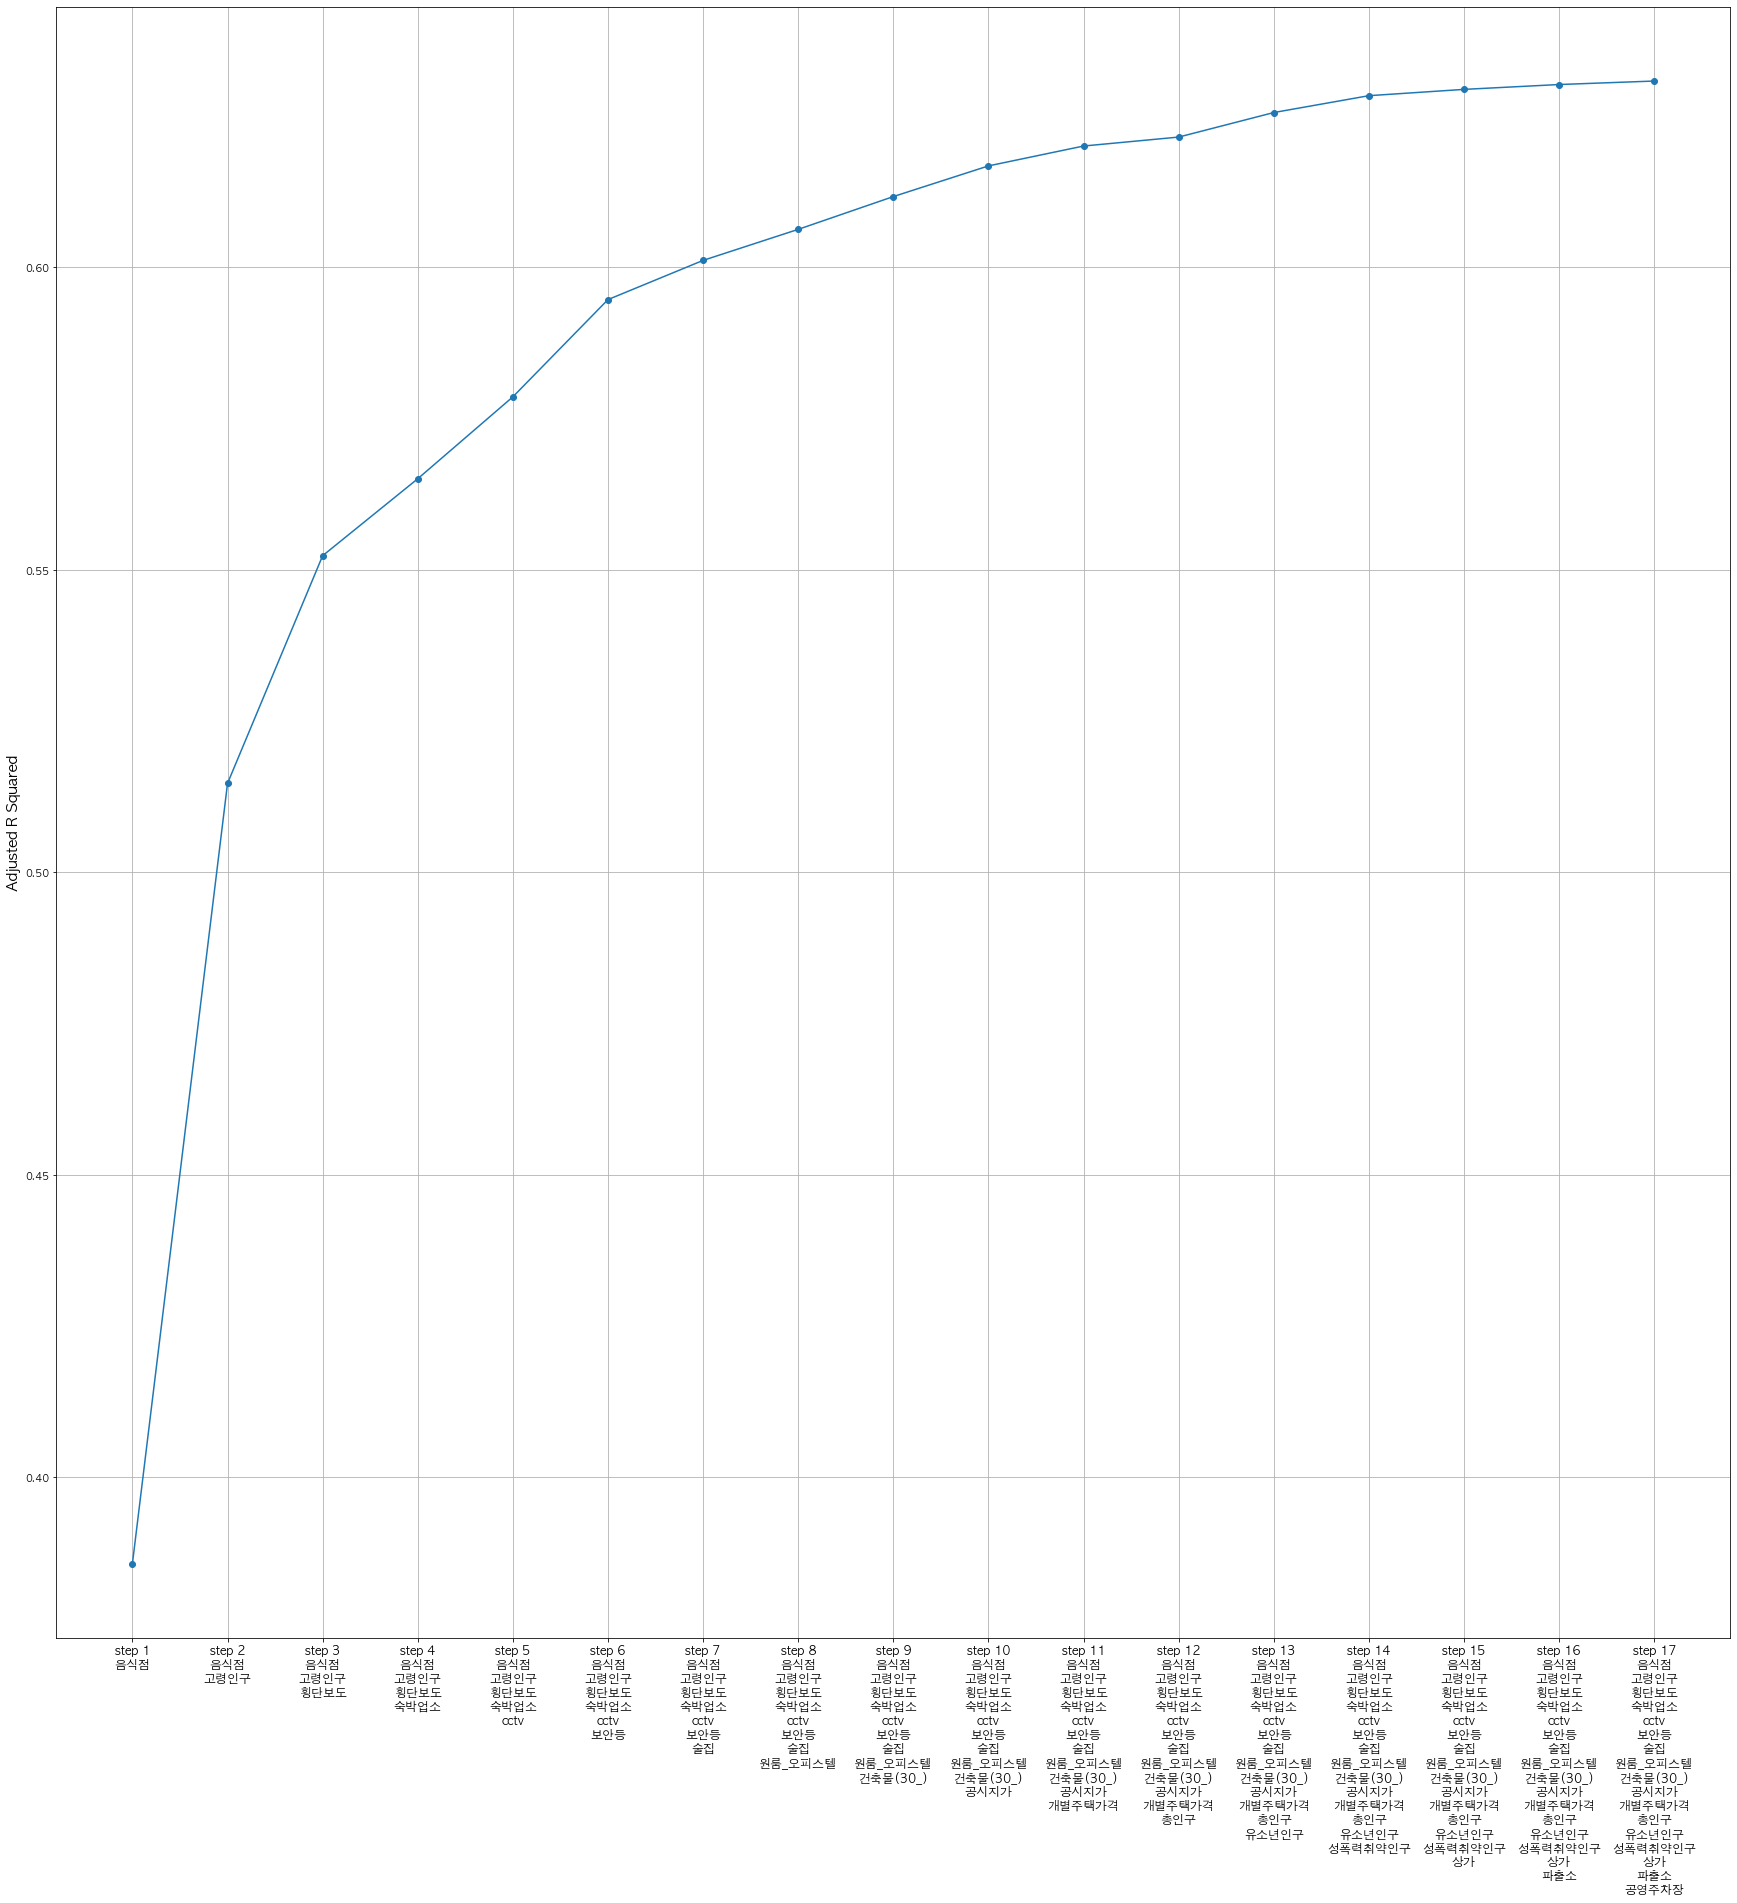

In [571]:
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [572]:
## 후진 소거법
y = target

selected_variables = feature.columns.tolist()

sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(new_grid[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(feature[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [573]:
selected_variables

['총인구',
 '유소년인구',
 '고령인구',
 '개별주택가격',
 '공시지가',
 '공영주차장',
 '보안등',
 '상가',
 '숙박업소',
 '술집',
 '원룸_오피스텔',
 '파출소',
 'cctv',
 '횡단보도',
 '성폭력취약인구',
 '건축물(30_)']

In [574]:
# 다중 선형회귀분석
x_data = new_grid[selected_variables]
y = target

# for b0, 상수항 추가
X = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     218.1
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:13:19   Log-Likelihood:                -3147.6
No. Observations:                2038   AIC:                             6329.
Df Residuals:                    2021   BIC:                             6425.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1382      0.038      3.670      0.000       0.064       0.212
총인구            0.0038      0.001      6.116      0.000       0.003       0.005
유소년인구         -0.0105      0.002     -6.171      0.000      -0.014      -0.007
고령인구          -0.0024      0.001     -1.986      0.047      -0.005   -2.99e-05
개별주택가격      6.751e-10   1.73e-10      3.901      0.000    3.36e-10    1.01e-09
공시지가        4.508e-07   9.92e-08      4.544      0.000    2.56e-07    6.45e-07
공영주차장          0.2630      0.124      2.116      0.034       0.019       0.507
보안등           -0.0301      0.003     -9.996      0.000      -0.036      -0.024
상가             0.0058      0.001      4.775      0.000       0.003       0.008
숙박업소           0.1283      0.022      5.886      0.000       0.086       0.171
술집             0.1744      0.013     13.132      0.000       0.148       0.200
원룸_오피스텔        0.0069      0.002      2.854      0.004       0.002       0.012
파출소            0.6288      0.265      2.369      0.018       0.108       1.149
cctv           0.1972      0.031      6.390      0.000       0.137       0.258
횡단보도           0.0402      0.006      6.711      0.000       0.028       0.052
성폭력취약인구       -0.0133      0.003     -4.136      0.000      -0.020      -0.007
건축물(30_)       0.0071      0.001      6.832      0.000       0.005       0.009
==============================================================================
Omnibus:                      489.203   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1649.668
Skew:                           1.174   Prob(JB):                         0.00
Kurtosis:                       6.731   Cond. No.                     2.03e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

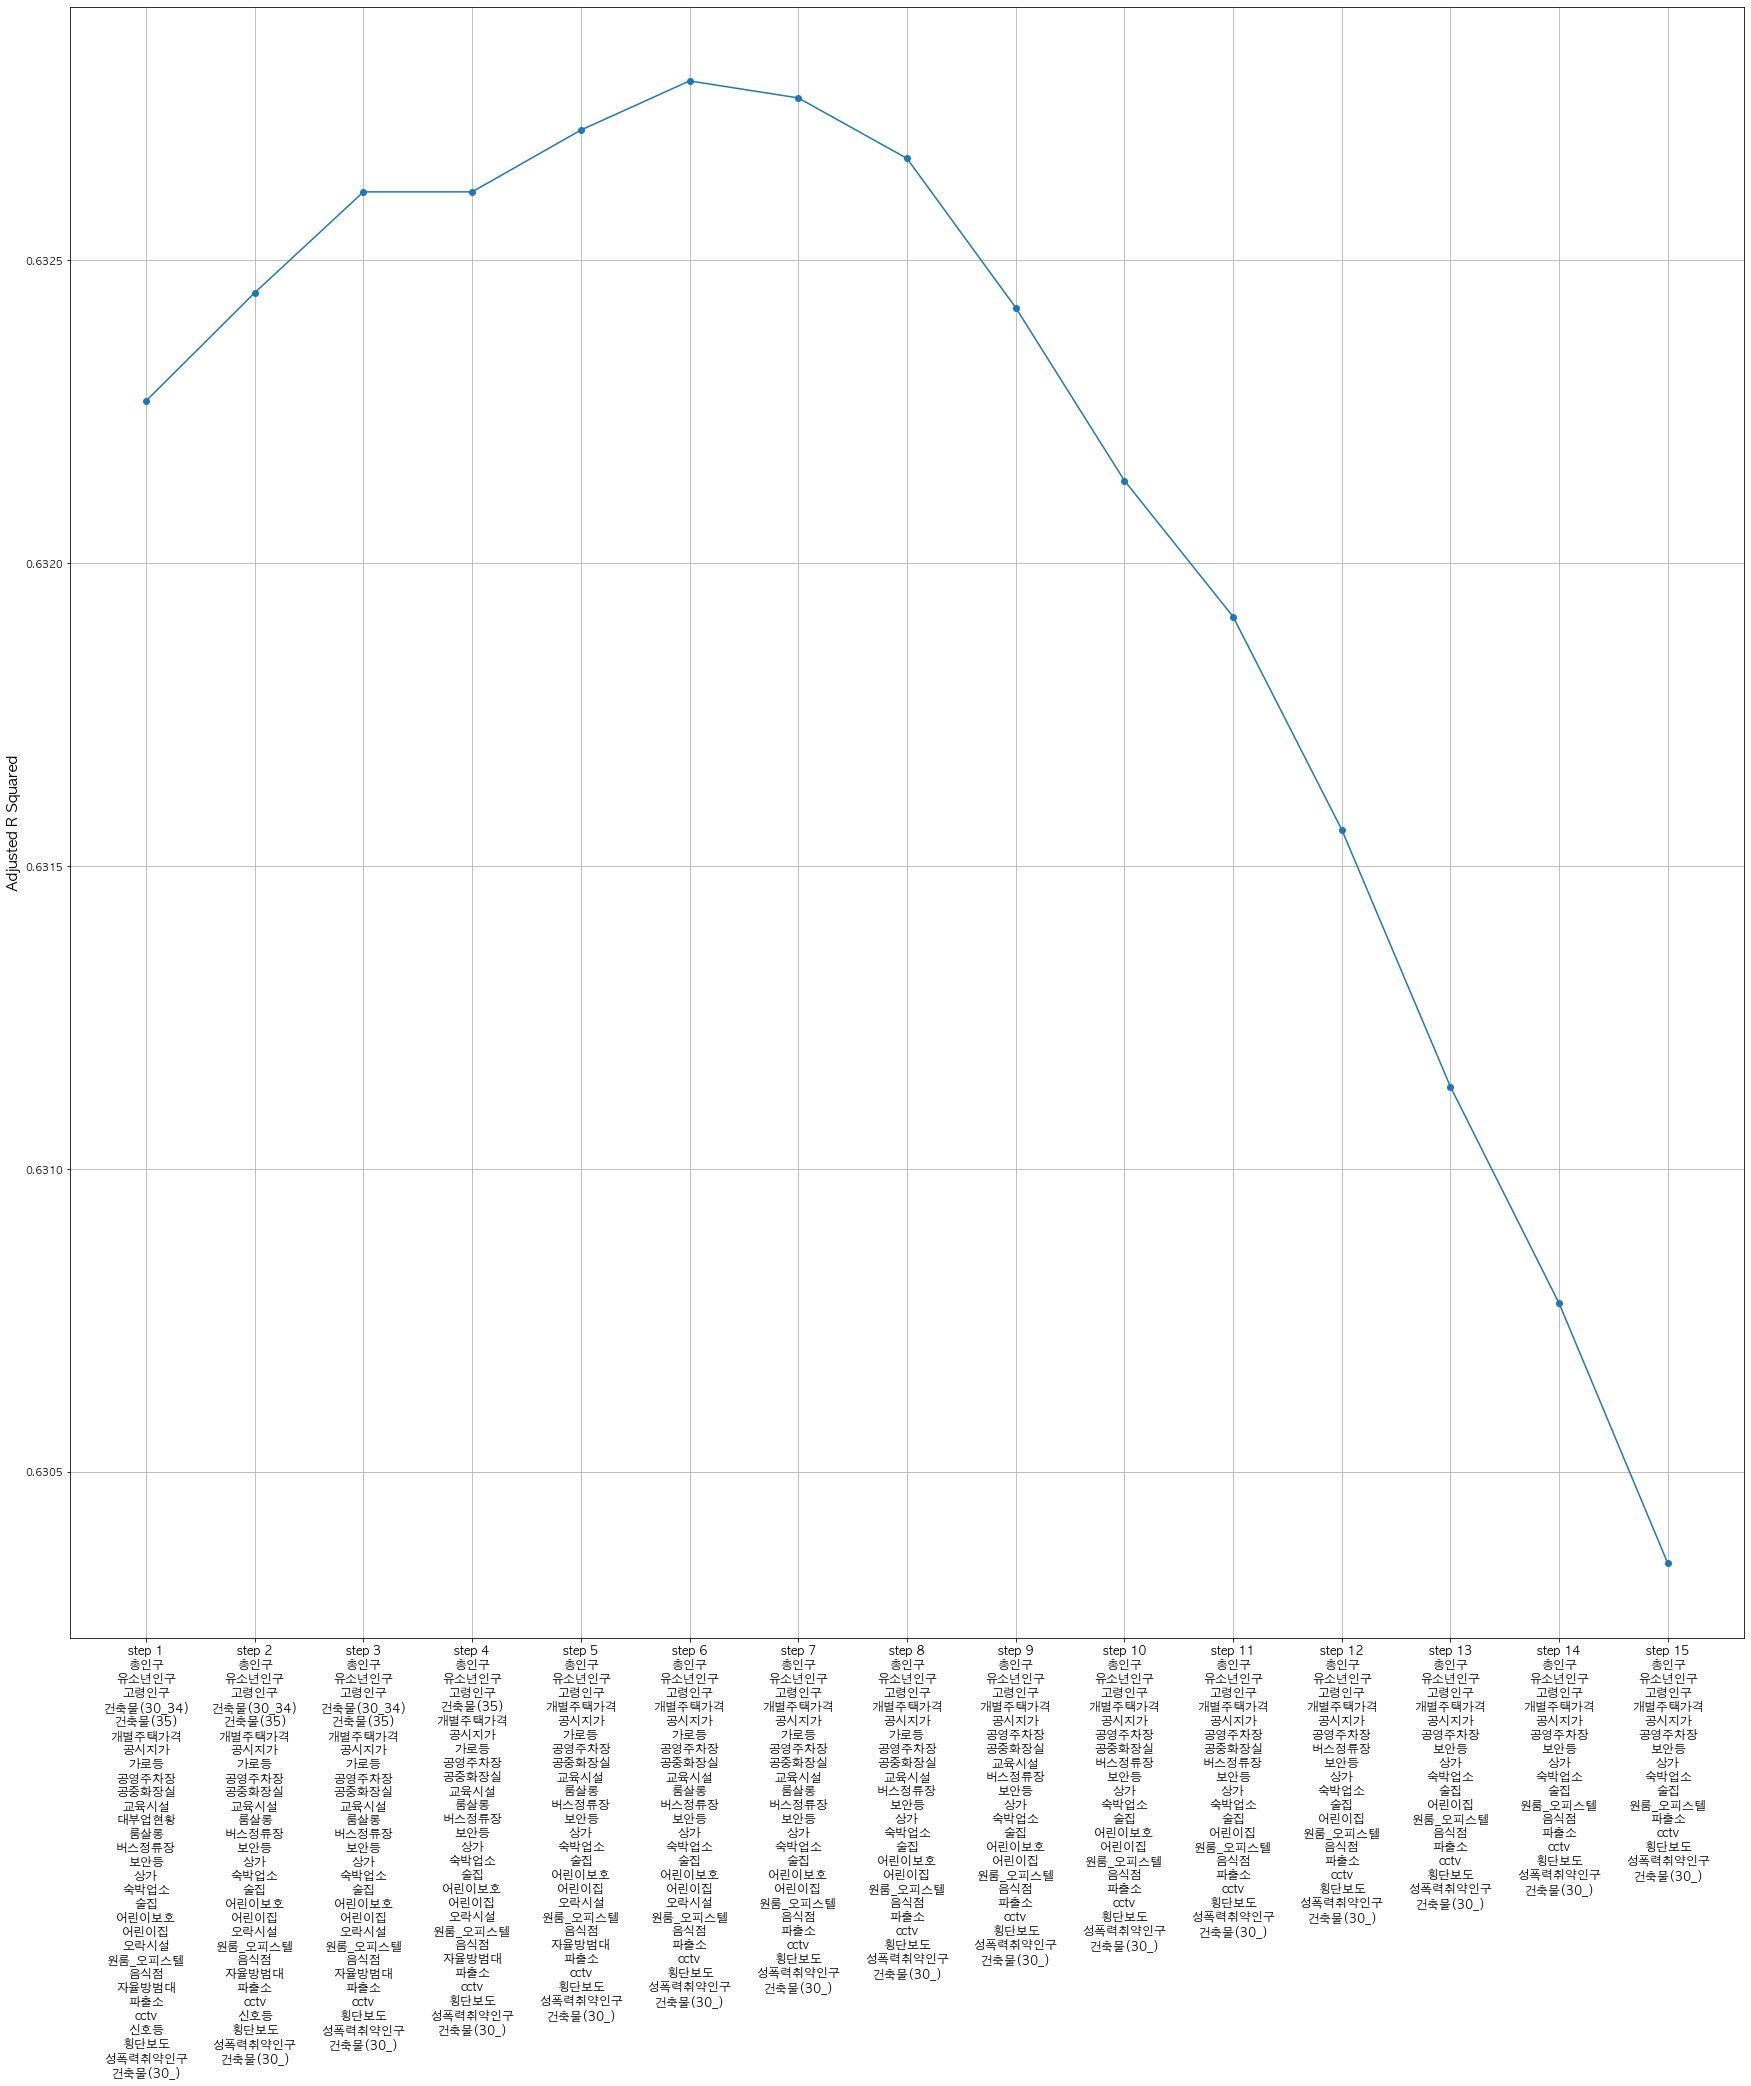

In [575]:
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [576]:
## 전진 단계별 선택법

variables = feature.columns.tolist() ## 설명 변수 리스트
 
y = target  ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = new_grid[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = new_grid[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(target,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(new_grid[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [577]:
# 다중 선형회귀분석
x_data = new_grid[selected_variables]
y = target

# for b0, 상수항 추가
X = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     218.1
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:13:23   Log-Likelihood:                -3147.7
No. Observations:                2038   AIC:                             6329.
Df Residuals:                    2021   BIC:                             6425.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1487      0.038      3.941      0.000       0.075       0.223
음식점            0.0105      0.005      1.971      0.049       5e-05       0.021
횡단보도           0.0406      0.006      6.796      0.000       0.029       0.052
숙박업소           0.1306      0.022      5.991      0.000       0.088       0.173
cctv           0.1973      0.031      6.392      0.000       0.137       0.258
보안등           -0.0308      0.003    -10.172      0.000      -0.037      -0.025
술집             0.1481      0.019      7.721      0.000       0.110       0.186
원룸_오피스텔        0.0077      0.002      3.203      0.001       0.003       0.012
건축물(30_)       0.0069      0.001      6.691      0.000       0.005       0.009
공시지가        4.039e-07   1.02e-07      3.958      0.000    2.04e-07    6.04e-07
개별주택가격       6.84e-10   1.73e-10      3.957      0.000    3.45e-10    1.02e-09
총인구            0.0027      0.000     11.164      0.000       0.002       0.003
유소년인구         -0.0075      0.001     -9.480      0.000      -0.009      -0.006
성폭력취약인구       -0.0088      0.002     -3.915      0.000      -0.013      -0.004
상가             0.0038      0.002      2.473      0.013       0.001       0.007
파출소            0.5988      0.266      2.252      0.024       0.077       1.120
공영주차장          0.2734      0.124      2.205      0.028       0.030       0.516
==============================================================================
Omnibus:                      496.334   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1691.110
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.778   Cond. No.                     2.03e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

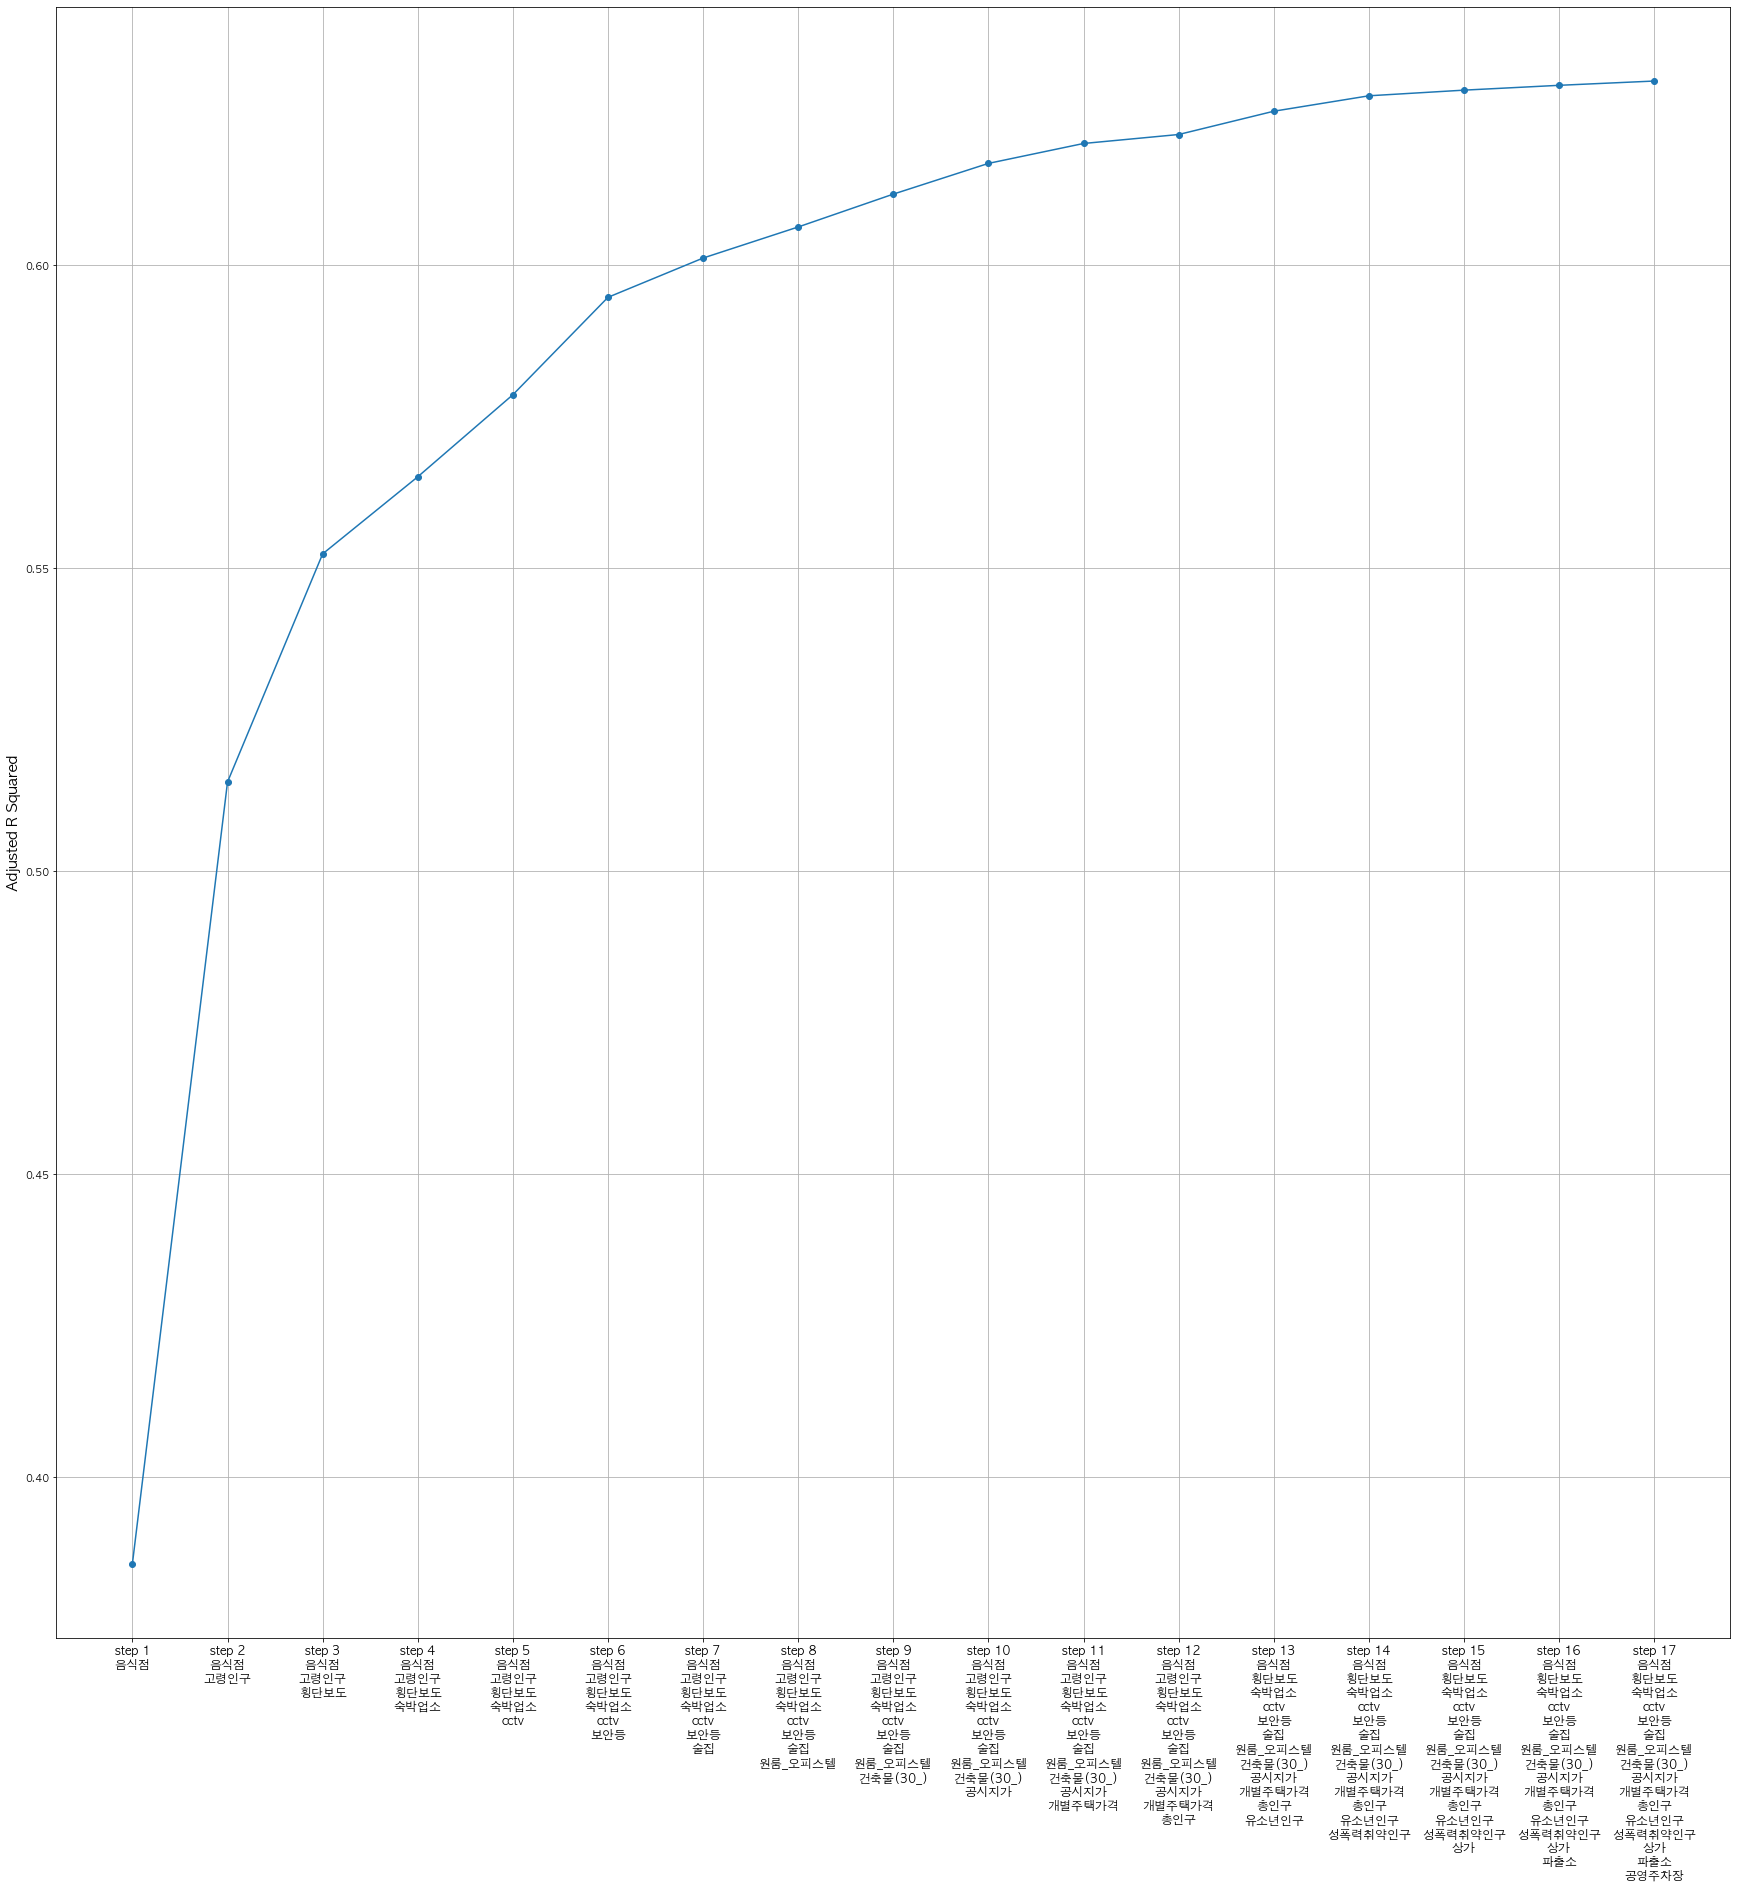

In [578]:
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [579]:
scaler = StandardScaler()
new_grid[numerical_feats] = scaler.fit_transform(new_grid[numerical_feats])

In [580]:
X = feature
y = target

selected_variables = [] ## 선택된 변수들

sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(feature) > 0:
    remainder = list(set(feature) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(target,sm.add_constant(feature[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [581]:
# 다중 선형회귀분석
x_data = new_grid[selected_variables]
y = target

# for b0, 상수항 추가
X = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     205.7
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:13:27   Log-Likelihood:                -3146.0
No. Observations:                2038   AIC:                             6328.
Df Residuals:                    2020   BIC:                             6429.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2193      0.025     48.377      0.000       1.170       1.269
음식점            0.1334      0.073      1.830      0.067      -0.010       0.276
고령인구          -0.2249      0.122     -1.847      0.065      -0.464       0.014
횡단보도           0.2232      0.034      6.599      0.000       0.157       0.290
숙박업소           0.1670      0.028      5.958      0.000       0.112       0.222
cctv           0.2218      0.034      6.441      0.000       0.154       0.289
보안등           -0.3055      0.030    -10.129      0.000      -0.365      -0.246
술집             0.3828      0.049      7.770      0.000       0.286       0.479
원룸_오피스텔        0.0935      0.033      2.856      0.004       0.029       0.158
건축물(30_)       0.2351      0.034      6.933      0.000       0.169       0.302
공시지가           0.1539      0.039      3.987      0.000       0.078       0.230
개별주택가격         0.1053      0.027      3.858      0.000       0.052       0.159
총인구            2.1729      0.363      5.992      0.000       1.462       2.884
유소년인구         -0.8917      0.148     -6.029      0.000      -1.182      -0.602
성폭력취약인구       -0.6629      0.164     -4.054      0.000      -0.984      -0.342
상가             0.1369      0.053      2.583      0.010       0.033       0.241
파출소            0.0578      0.026      2.265      0.024       0.008       0.108
공영주차장          0.0553      0.027      2.038      0.042       0.002       0.108
==============================================================================
Omnibus:                      497.733   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1696.759
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       6.783   Cond. No.                         40.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [582]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.4126594700686948


array([[762,  16,   0, 373,   6,   0,   0,   0,   0,   0,   0],
       [205,  29,   0,  92,   0,   0,   0,   0,   0,   0,   0],
       [ 58,  19,   0,  35,   0,   0,   0,   0,   0,   0,   0],
       [ 81,  20,   0,  50,   1,   0,   0,   0,   0,   0,   0],
       [ 71,  20,   0,  37,   0,   0,   0,   0,   0,   0,   0],
       [ 42,  10,   0,  27,   0,   0,   0,   0,   0,   0,   0],
       [ 24,  11,   0,  10,   0,   0,   0,   0,   0,   0,   0],
       [ 17,   4,   0,   4,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
print(len(new_grid[new_grid['GRADE_폭력']==0]))
print(len(new_grid[new_grid['GRADE_폭력']>0]))

In [ ]:
violence_0 = new_grid.query('GRADE_폭력<1')
violence_1 = new_grid.query('GRADE_폭력<=2 & GRADE_폭력>=1')
violence_2 = new_grid.query('GRADE_폭력<5 & GRADE_폭력>=3')
violence_3 = new_grid.query('GRADE_폭력<=6 & GRADE_폭력>=5')
violence_4 = new_grid.query('GRADE_폭력<=8 & GRADE_폭력>=7')
violence_5 = new_grid.query('GRADE_폭력<=10 & GRADE_폭력>=9')

In [ ]:
print(len(violence_0),len(violence_1),len(violence_2),len(violence_3),len(violence_4),len(violence_5))

In [584]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [585]:
violence_0 = new_grid.query('GRADE_폭력==0')
violence_1 = new_grid.query('GRADE_폭력==1')
violence_2 = new_grid.query('GRADE_폭력==2')
violence_3 = new_grid.query('GRADE_폭력==3')
violence_4 = new_grid.query('GRADE_폭력==4')
violence_5 = new_grid.query('GRADE_폭력==5')
violence_6 = new_grid.query('GRADE_폭력==6')
violence_7 = new_grid.query('GRADE_폭력==7')
violence_8 = new_grid.query('GRADE_폭력==8')
violence_9 = new_grid.query('GRADE_폭력==9')
violence_10 = new_grid.query('GRADE_폭력==10')

In [586]:
F_statistic, pVal = stats.f_oneway(violence_0, violence_1, violence_2)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

ValueError: could not convert string to float: '다마54bb65ab'